# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


---
# Projet A2023 : Prédiction du nombre de passages sur le REV 


L’analyse des données ouvertes de la circulation sur la rue Saint-Denis révèle une hausse importante de l’utilisation du vélo par rapport aux autres véhicules, au tournant de l’installation du Réseau express vélo (REV) en 2020 comme le rapporte le journal *Le Devoir* dans cet [article](https://www.ledevoir.com/environnement/735849/le-ratio-velo-auto-s-ameliore-sur-le-rev-saint-denis). Serez-vous en mesure de prédire l'achalandage du REV pour l'année 2023, de janvier à septembre ? Est-ce que les conditions météorologiques ont une influence sur le nombre de passages ? Ce sont des questions que vous aurez l'occasion d'étudier dans le cadre de ce projet.

**But** : Prédire le nombre de passages journalier sur le REV en direction nord à l'intersection de la rue St-Denis et de la Piste des Carrières pour tous les jours entre le 1er janvier 2023 et le 30 septembre 2023.

**Objectifs spécifiques non exhaustifs**
1. Effectuer une analyse exploratoire des données afin d'extraire qualitativement certains les potentiels liens entre les variables.
2. Élaborer plusieurs modèles prédictifs pour le nombre de passages journaliers sur le REV en fonction des différentes variables explicatives à disposition (nombre de passages sur d'autres tronçons, conditions météorologiques, etc.).
3. Sélectionner le meilleur modèle prédicitif à l'aide d'un critère choisi.
4. Exploiter le modèle choisi pour effectuer vos prédictions.

Ces étapes peuvent être recommencées autant de fois que nécessaire afin d'obtenir le meilleur modèle prédictif possible.

La description du projet est disponible à l'adresse suivante : https://www.kaggle.com/t/b2f3163a94434f0da9e532139744c49d

Ce calepin Jupyter de base permet de charger les données fournies. La dernière section détaille la génération du fichier des prédictions afin de le soumettre sur Kaggle dans le bon format.

### Données

Dans un premier temps, vous devrez récupérer les données sur Kaggle. Les fichiers disponibles sont les suivants :
- train.csv
- test.csv

**Déposez ces fichiers dans le répertoire de ce calepin.**

Le fichier *train.csv* contient les conditions météorologiques ainsi que le nombre de passages enregistrés sur le tronçon du REV à l'intersection St-Denis/Castelnau (45.53905N,-73.61687W). Voici la description des variables :

- Date : date
- MaxTemp : Température maximale (°C)
- MinTemp : Température minimale (°C)
- MeanTemp : Température moyenne (°C)
- TotalRain : Accumulation totale de pluie (mm)
- TotalSnow : Accumulation totale de neige (cm)
- TotalPrecip : Accumulation totale de précipitations (pluie + neige, mm)
- SnowGrnd : Couvert de neige au sol (cm)
- SpdGust : Vitesse maximale des rafales de vent (km/h)
- REV : Nombre de passages de vélo au compteur sur le REV en direction sud à l'intersection St-Denis/Castelnau 

Le fichier *test.csv* contient les conditions météorologiques pour l'année 2023 mais pas le nombre de passages sur le REV, la variable que vous devrez prédire. Le fichier contient aussi l'identifiant (:ID) pour les prédictions. La qualité de vos prédictions sera ensuite évaluée avec le [*Root Mean Squared Log Error*](https://www.kaggle.com/code/carlolepelaars/understanding-the-metric-rmsle) lorsque vous les téléverserez sur Kaggle. Vos prédictions seront comparées à celles des autres équipes de la classe.


### Consignes

- Vous devez constituer une équipe de 3 à 5 personnes.
- Au moins une solution doit être proposée sur Kaggle.
- Utilisez votre identifiant d'équipe pour téléverser vos prédictions sur Kaggle.
- Un seul calepin *.ipynb* par équipe doit être remis. Ce fichier devra documenter et illustrer la procédure qui vous a permis de produire vos meilleures prédictions. Ce fichier constitue le rapport final du projet.
- Le langage Julia doit être utilisé.
- Votre démarche doit être rigoureusement justifiée (consultez la grille de correction pour vous orienter).

### Quelques conseils

Votre calepin doit permettre à une personne à l'extérieur de l'équipe de comprendre votre démarche et de reproduire vos résultats. Par exemple, une bonne façon de faire consiste à expliquer dans une cellule de texte la tâche qui est accomplie dans la cellule de code suivante. 

Je vous encourage fortement à faire une analyse exploratoire des données pour développer une meilleure expertise sur le problème. C'est une étape qui est toujours négligée mais qui est essentielle. C'est avec l'analyse exploratoire que vous viendra des idées d'amélioration, comme par exemple créer de nouvelles variables explicatives.

Vous pouvez utiliser directement tout ce qui se trouve dans les notes de cours sans explication et toutes les librairies utilisées dans le cours (incluant mes fonctions).

Ce calepin contient un modèle très simple de prédiction : on n'utilise qu'une seule variable explicative. Ce sera votre travail d'améliorer ces prédictions avec la méthode et les variables de votre choix.

S'il y a des données manquantes, ce sera à vous de traiter ce problème. Vous devriez développer une méthode d'imputation (de remplacement) des données manquantes.

Attention aux données aberrantes. Elles peuvent faire dérailler tous le modèle prédictif si elle ne sont pas prises en compte.

Prenez la peine de documenter succinctement les essais infructueux. Ce n'est pas nécessaire de les expliquer en détails, mais c'est important de les mentionner dans la discussion avec une raison possible de leur échec. De cette façon, une personne qui reprendra votre travail dans le futur ne perdra pas de temps à réessayer une méthode infructueuse déjà testée.

Vous pouvez aussi indiquer dans votre rapport les raisons qui vous font croire pourquoi une méthode a moins bien performée de ce qui était attendu. Vous pouvez également mentionner ce que vous auriez pu tenter si vous aviez eu plus de temps ou plus de données. L'idée est de guider l'analyste qui prendrait la relève de votre travail.

Vous êtes limités à deux soumissionspar jour et par équipe sur Kaggle. Je vous suggère donc de bien tester vos modèles localement et de ne téléverser que vos meilleurs prédictions de la journée.

In [504]:
using CSV, DataFrames, Dates, Gadfly, GLM, Statistics, Pkg, GLMNet

# Pkg.add("MultivariateStats")
# Pkg.add("StatsBase")
# Pkg.add("GLMnet")

---
## 1. Chargement de données

In [505]:
train = CSV.read("./nombres-de-passages-sur-le-rev/train.csv", DataFrame)
first(train, 5)

#Traitement de train :

function coalesceWithPrevious!(df::DataFrame, columns::AbstractVector{<:Symbol})
    for column in columns
        col = df[!, column]

        if ismissing(col[1])
            col[1] = col[findfirst(.!(ismissing.(col)))]
        end

        ind = findall(ismissing.(col))

        for i in ind
            col[i] = col[i-1]
        end
    end

    return df
end

columns = [:Date,:MaxTemp,:MinTemp,:MeanTemp,:TotalRain,:TotalSnow,:TotalPrecip,:SnowGrnd,:SpdGust,:REV]
# for col in columns
#     if any(ismissing, train[!, col])
#         # Extract non-missing values and their indices
#         mean_value = round(mean(skipmissing(train[!, col])))
#         ind = findall(ismissing.(train[!, col]))
#         # good = findall(.!(ismissing.(train[!, col])))

#         for i in ind
#             train[!, col][i] = mean_value
#         end

#         # for i in good
#         #     train[!, col][i] = 1
#         # end
#     end
# end

# display(train)
coalesceWithPrevious!(train, columns)

# Nombre de valeurs manquantes après le remplacement
for column in columns
    println("Nombre de valeurs manquantes après le remplacement ($column) : ", count(ismissing.(train[!, column])))
end
      

Nombre de valeurs manquantes après le remplacement (Date) : 0
Nombre de valeurs manquantes après le remplacement (MaxTemp) : 0
Nombre de valeurs manquantes après le remplacement (MinTemp) : 0
Nombre de valeurs manquantes après le remplacement (MeanTemp) : 0
Nombre de valeurs manquantes après le remplacement (TotalRain) : 0
Nombre de valeurs manquantes après le remplacement (TotalSnow) : 

0
Nombre de valeurs manquantes après le remplacement (TotalPrecip) : 0
Nombre de valeurs manquantes après le remplacement (SnowGrnd) : 0
Nombre de valeurs manquantes après le remplacement (SpdGust) : 0
Nombre de valeurs manquantes après le remplacement (REV) : 0


---
## 2. Analyse exploratoire


#### 2.1 Nombre de passages sur le REV en fonction de la date

In [506]:
# Supposons que df est votre DataFrame
date_column = train.Date

# Utiliser typeof pour obtenir le type de la colonne Date
date_type = typeof(date_column)

#date=Date(2002,09,11)

#typeof(date)

Vector{Date} (alias for Array{Date, 1})

In [507]:
#prochainement : visualiser le log

set_default_plot_size(12cm, 10cm)
#plot(train, x=:Date, y=:REV)

#using Plots

set_default_plot_size(12cm, 10cm)
plot(train, x=:Date, y=:REV)

#Ajout des variables explicatives:

#X1=Jour férié
#X2=automne 
#X3=hiver 
#X4=été 
#X5=printemps 
#X6=les mois de avril à novembre 

#jours féries : il y a beaucoup plus de monde dans la période entre fin juin et novembre pour 2022, pour 2021 il y a plus de monde
# pour le mois de novembre

#aut 2022 : sens décroissant
#hiver 2023 : pas très clair visualiser janvier
#été 2022
#printemps 2022 : sens croissant
#été 2022 : tout le temps bcp de monde
#mois de avril à novembre : arc 
#besoin de visualiser les mois de 5 à 8

#2021:
#jours fériés : novembre
#automne fin octobre jusqu'à mi novembre
#hiver : peu de monde en général
#pas d'autres saisons 2021

#visualiser donc fin octobre jusqu'à mi novembre pour le plus de monde

df=deepcopy(train)

#first(df,5)

df.X1 .= 0

#first(df,5)

date=2022

#print(1)
# Jour de l'An
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 1) .& (day.(df.Date) .== 1), :X1] .= 1
#first(df,10)

# Saint-Jean-Baptiste
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 6) .& (day.(df.Date) .== 24), :X1] .= 1

# Fête du Canada
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 7) .& (day.(df.Date) .== 1), :X1] .= 1

# Fête du travail
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 9) .& (day.(df.Date) .== 4), :X1] .= 1

# Journée nationale de la vérité et de la réconciliation
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 9) .& (day.(df.Date) .== 30), :X1] .= 1

# Jour du Souvenir
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 11) .& (day.(df.Date) .== 11), :X1] .= 1

# Noël
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 12) .& (day.(df.Date) .== 25), :X1] .= 1

# Lendemain de Noël
df[(year.(df.Date) .== date) .& (month.(df.Date) .== 12) .& (day.(df.Date) .== 26), :X1] .= 1

# Création des colonnes X2 (automne), X3 (hiver), X4 (été), X5 (printemps)
df[!, :X2] .= Int.(df.Date .>= Date.(year.(df.Date), 09, 15)) .& (df.Date .<= Date.(year.(df.Date), 11, 14))
df[!, :X3] .= Int.(df.Date .>= Date.(year.(df.Date), 11, 15)) .& (df.Date .<= Date.(year.(df.Date) .+ 1, 03, 14))
df[!, :X4] .= Int.(df.Date .>= Date.(year.(df.Date), 05, 15)) .& (df.Date .<= Date.(year.(df.Date), 09, 14))
df[!, :X5] .= Int.(df.Date .>= Date.(year.(df.Date), 03, 15)) .& (df.Date .<= Date.(year.(df.Date), 05, 14))

df[!, :X6] .= Int.((year.(df.Date) .== date) .& (month.(df.Date) .>= 4) .& (month.(df.Date) .<= 11))
df[!, :X7] .= Int.((year.(df.Date) .== date) .& (month.(df.Date) .>= 5) .& (month.(df.Date) .<= 8))

first(df,5)
# Filtrer la DataFrame pour inclure uniquement les lignes où X1 est égal à 1
#df_filtered = df[df.X7 .== 1, :]
#first(df_filtered,6)

# Créer un graphique en utilisant la colonne Date comme axe des x et la colonne REV comme axe des y
#plot(df_filtered, x=:Date, y=:REV)

#on peut prendre l'été, et le printemps commes les plus significatives et l'automne

#dernier choix pour la date : on rajoute les saisons comme variables explicatives

train.X2=df.X2
train.X3=df.X3
train.X4=df.X4
train.X5=df.X5

#on essaie le log pour avoir tout sur la même échelle

data = deepcopy(train)
data[!,:REV] = log.(train.REV)

first(data,5)


Row,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV,X2,X3,X4,X5
,Date,Float64?,Float64?,Float64?,Float64,Float64,Float64,Int64?,Int64?,Float64,Int64,Int64,Int64,Int64
1,2021-10-23,8.2,1.6,4.9,0.0,0.0,0.0,0,43,5.12396,1,0,0,0
2,2021-10-24,11.9,2.5,7.2,0.0,0.0,0.0,0,43,6.54247,1,0,0,0
3,2021-10-25,7.8,3.0,5.4,1.2,0.0,1.2,0,43,6.61473,1,0,0,0
4,2021-10-26,11.3,7.2,9.3,7.2,0.0,7.2,0,53,6.4708,1,0,0,0
5,2021-10-27,12.6,6.1,9.4,0.0,0.0,0.0,0,59,7.1309,1,0,0,0


In [508]:
#train en fonction de chaque saison

set_default_plot_size(16cm, 12cm)

train_filtered2 = data[data.X2 .== 1, :]
train_filtered3 = data[data.X3 .== 1, :]
train_filtered4 = data[data.X4 .== 1, :]
train_filtered5 = data[data.X5 .== 1, :]


Row,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV,X2,X3,X4,X5
,Date,Float64?,Float64?,Float64?,Float64,Float64,Float64,Int64?,Int64?,Float64,Int64,Int64,Int64,Int64
1,2022-03-15,2.3,-4.2,-1.0,0.0,0.0,0.0,4,60,5.87212,0,0,0,1
2,2022-03-16,6.8,-5.0,0.9,0.0,0.0,0.0,3,41,6.03548,0,0,0,1
3,2022-03-17,15.8,0.5,8.2,0.0,0.0,0.0,1,41,6.40853,0,0,0,1
4,2022-03-18,9.2,1.6,5.4,0.0,0.0,0.0,0,36,6.25575,0,0,0,1
5,2022-03-19,5.1,1.5,3.3,20.8,0.0,20.8,0,52,4.8828,0,0,0,1
6,2022-03-20,5.4,0.0,2.7,3.6,0.0,3.6,0,54,5.01064,0,0,0,1
7,2022-03-21,6.5,-1.1,2.7,0.0,0.0,0.0,0,56,6.24028,0,0,0,1
8,2022-03-22,4.5,-3.6,0.5,0.0,0.0,0.0,0,50,6.20456,0,0,0,1
9,2022-03-23,4.7,-5.2,-0.3,0.0,0.0,0.0,0,39,6.33328,0,0,0,1


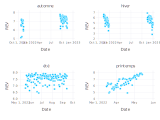

In [509]:
#Visualiser en fonction des saisons

fig1 = plot(train_filtered2, x=:Date, y=:REV, Guide.title("automne"))
fig2 = plot(train_filtered3, x=:Date, y=:REV, Guide.title("hiver"))
fig3 = plot(train_filtered4, x=:Date, y=:REV, Guide.title("été"))
fig4 = plot(train_filtered5, x=:Date, y=:REV, Guide.title("printemps"))

gridstack([fig1 fig2; fig3 fig4])

#on visualise de plus près l'automne et l'hiver

#plot(train_filtered2, x=:Date, y=:REV, Guide.title("automne"))
#plot(train_filtered3, x=:Date, y=:REV, Guide.title("hiver"))

#résultats : automne et hiver décroissant, printemps croissant et été presque constant (beaucoup de monde presque chaque jour)

In [510]:
####### sepration de spdgut et SnowGrnd

mean_spd_gust = mean(skipmissing(train[!, :SpdGust]))
mean_snw_grnd = mean(skipmissing(train[!, :SnowGrnd]))
# Calculate the mean of Feature1 without considering zeros
mean_feature1_without_zeros = mean(skipmissing(train[train[!, :TotalRain] .!= 0, :TotalRain]))

# Calculate the mean of Feature2 without considering zeros
mean_feature2_without_zeros = mean(skipmissing(train[train[!, :TotalPrecip] .!= 0, :TotalPrecip]))

# Calculate the mean of Feature2 without considering zeros
mean_feature3_without_zeros = mean(skipmissing(train[train[!, :TotalSnow] .!= 0, :TotalSnow]))

function gust_function(x)
    if x < 20
        return 0
    elseif x < 25
        return 1
    elseif x < 30
        return 2
    elseif x < 40
        return 3
    elseif x < 57
        return 4
    else
        return 5
    end
end

function snow_function(x)
    if x > 19
        return 1
    else
        return 0
    end
end

function other(x, mean::Float64)
    return x > mean ? 1 : 0
end

data[!, :NewSpdGust] .= gust_function.(data[:, :SpdGust])
# data[!, :NewSnowGrnd] .= snow_function.(data[:, :SnowGrnd])

# data[!, :TotalRain] .= other.(data[:, :TotalRain], mean_feature1_without_zeros)
# data[!, :TotalPrecip] .= other.(data[:, :TotalPrecip], mean_feature2_without_zeros)
# data[!, :TotalSnow] .= other.(data[:, :TotalSnow], mean_feature3_without_zeros)
display(data)

Row,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV,X2,X3,X4,X5,NewSpdGust
,Date,Float64?,Float64?,Float64?,Float64,Float64,Float64,Int64?,Int64?,Float64,Int64,Int64,Int64,Int64,Int64
1,2021-10-23,8.2,1.6,4.9,0.0,0.0,0.0,0,43,5.12396,1,0,0,0,4
2,2021-10-24,11.9,2.5,7.2,0.0,0.0,0.0,0,43,6.54247,1,0,0,0,4
3,2021-10-25,7.8,3.0,5.4,1.2,0.0,1.2,0,43,6.61473,1,0,0,0,4
4,2021-10-26,11.3,7.2,9.3,7.2,0.0,7.2,0,53,6.4708,1,0,0,0,4
5,2021-10-27,12.6,6.1,9.4,0.0,0.0,0.0,0,59,7.1309,1,0,0,0,5
6,2021-10-28,10.8,3.4,7.1,0.0,0.0,0.0,0,45,7.22475,1,0,0,0,4
7,2021-10-29,12.7,0.9,6.8,0.0,0.0,0.0,0,36,7.19068,1,0,0,0,3
8,2021-10-30,12.7,2.5,7.6,12.8,0.0,12.8,0,38,6.49527,1,0,0,0,3
9,2021-10-31,11.1,7.8,9.5,38.0,0.0,38.0,0,45,5.23644,1,0,0,0,4


#### 2.2 Nombre de passages sur le REV en fonction des conditions météorologiques

In [511]:
set_default_plot_size(16cm, 12cm)

fig1 = plot(train, x=:MeanTemp, y=:REV)
fig2 = plot(train, x=:TotalPrecip, y=:REV)
fig3 = plot(train, x=:SnowGrnd, y=:REV)
fig4 = plot(train, x=:SpdGust, y=:REV)

gridstack([fig1 fig2; fig3 fig4])

In [ ]:
#on divise par l'écart-type :

#using Statistics

function standardize_column(x::AbstractVector)
    return (x.-mean(x)) ./ std(x)
end

# data.MaxTemp .= log.(data.MaxTemp)
# data.MinTemp .= log.(data.MinTemp)
# data.MeanTemp .= log.(data.MeanTemp)
# data.TotalRain .= log.(data.TotalRain)
# data.TotalSnow .= log.(data.TotalSnow)
# data.TotalPrecip .= log.(data.TotalPrecip)
# data.SnowGrnd .= log.(data.SnowGrnd)
# data.SpdGust .= log.(data.SpdGust)

display(data)

# 0.88 et 0.12
lower_percentile = 0.12
upper_percentile = 0.88

# columns = [:MaxTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X4, :X5, :NewSpdGust, :NewSnowGrnd]

for col in names(data)
    lower_limit = quantile(data[!, col], lower_percentile)
    upper_limit = quantile(data[!, col], upper_percentile)

    data[!, col] .= max.(min.(data[!, col], upper_limit), lower_limit)
end


display(data)



# Standardiser chaque colonne de la DataFrame

data.MaxTemp = standardize_column(data.MaxTemp)
data.MinTemp = standardize_column(data.MinTemp)
data.MeanTemp = standardize_column(data.MeanTemp)
data.TotalRain = standardize_column(data.TotalRain)
data.TotalSnow = standardize_column(data.TotalSnow)
data.TotalPrecip = standardize_column(data.TotalPrecip)
data.SnowGrnd = standardize_column(data.SnowGrnd)
data.SpdGust = standardize_column(data.SpdGust)

#for col in ["MaxTemp","MinTemp","MeanTemp","TotalRain","TotalSnow","TotalPrecip","SnowGrnd","SpdGust"]
#    data.col .= standardize_column(data.col)
#end

# Afficher les premières lignes de la DataFrame après standardisation
first(data, 5)


In [ ]:
#Détection de la multicolinéarité
using MultivariateStats
using StatsBase
    
function calculate_r_squared(model)
    # Calculer le R carré en utilisant la fonction r2 du module GLM
    R2 = r2(model)
    
    return R2
end

#model = lm(@formula(REV ~ MaxTemp + MinTemp + MeanTemp + TotalRain + TotalSnow + TotalPrecip + SnowGrnd + SpdGust + X2 + X3 + X4 + X5), data)
variables_explicatives = [:MaxTemp, :MinTemp, :MeanTemp, :TotalRain, :TotalSnow, :TotalPrecip, :SnowGrnd, :SpdGust, :X2, :X3, :X4, :X5]

# Initialiser un vecteur pour stocker les VIF
vif_result = zeros(12)

for i in 1:12
    # Créer une copie de la liste des variables explicatives
    variables_explicatives_copie = copy(variables_explicatives)
    #println(variables_explicatives_copie)
    
    # Retirer la i-ème variable explicative
    vi=splice!(variables_explicatives_copie, i)
    filter!(x -> x != vi, variables_explicatives_copie)
    #println(variables_explicatives_copie)
    
    # Créer une nouvelle formule en fonction des variables explicatives restantes
    nouvelles_variables = Symbol.(variables_explicatives_copie)
    formule_expression = :(@formula($vi ~ $(:(+($(nouvelles_variables...))))))
    
    # Évaluer la formule dans la macro @formula
    nouvelle_formule = eval(formule_expression)
    
    # Ajuster le modèle avec la nouvelle formule
    nouveau_model = lm(nouvelle_formule, data)
    
    # Calculer le VIF pour la i-ème variable explicative
    vif_result[i] = 1. / (1. - calculate_r_squared(nouveau_model))
end

# Afficher les VIF
vif_result

# Obtenir le tableau des coefficients
#coefs = coeftable(model)

# Calculer le nombre total de coefficients (y compris l'intercept)
#num_coefficients = ncoefs(model)

# Calculer les VIF

In [ ]:
#Donc on enlève d'abord la 3ème variable explicative (MeanTemp) ayant la +grande valeur du VIF:

variables_explicatives = [:MaxTemp, :MinTemp, :TotalRain, :TotalSnow, :TotalPrecip, :SnowGrnd, :SpdGust, :X2, :X3, :X4, :X5]

vif_result = zeros(11)

for i in 1:11
    # Créer une copie de la liste des variables explicatives
    variables_explicatives_copie = copy(variables_explicatives)
    #println(variables_explicatives_copie)
    
    # Retirer la i-ème variable explicative
    vi=splice!(variables_explicatives_copie, i)
    filter!(x -> x != vi, variables_explicatives_copie)
    #println(variables_explicatives_copie)
    
    # Créer une nouvelle formule en fonction des variables explicatives restantes
    nouvelles_variables = Symbol.(variables_explicatives_copie)
    formule_expression = :(@formula($vi ~ $(:(+($(nouvelles_variables...))))))
    
    # Évaluer la formule dans la macro @formula
    nouvelle_formule = eval(formule_expression)
    
    # Ajuster le modèle avec la nouvelle formule
    nouveau_model = lm(nouvelle_formule, data)
    
    # Calculer le VIF pour la i-ème variable explicative
    vif_result[i] = 1. / (1. - calculate_r_squared(nouveau_model))
end

# Afficher les VIF
vif_result


In [ ]:
#On enlève TotalPrecip
variables_explicatives = [:MaxTemp, :MinTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X3, :X4, :X5]

vif_result = zeros(10)

for i in 1:10
    # Créer une copie de la liste des variables explicatives
    variables_explicatives_copie = copy(variables_explicatives)
    #println(variables_explicatives_copie)
    
    # Retirer la i-ème variable explicative
    vi=splice!(variables_explicatives_copie, i)
    filter!(x -> x != vi, variables_explicatives_copie)
    #println(variables_explicatives_copie)
    
    # Créer une nouvelle formule en fonction des variables explicatives restantes
    nouvelles_variables = Symbol.(variables_explicatives_copie)
    formule_expression = :(@formula($vi ~ $(:(+($(nouvelles_variables...))))))
    
    # Évaluer la formule dans la macro @formula
    nouvelle_formule = eval(formule_expression)
    
    # Ajuster le modèle avec la nouvelle formule
    nouveau_model = lm(nouvelle_formule, data)
    
    # Calculer le VIF pour la i-ème variable explicative
    vif_result[i] = 1. / (1. - calculate_r_squared(nouveau_model))
end

# Afficher les VIF
vif_result

In [ ]:
#On enlève MinTemp :

variables_explicatives = [:MaxTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X3, :X4, :X5]

vif_result = zeros(9)

for i in 1:9
    # Créer une copie de la liste des variables explicatives
    variables_explicatives_copie = copy(variables_explicatives)
    #println(variables_explicatives_copie)
    
    # Retirer la i-ème variable explicative
    vi=splice!(variables_explicatives_copie, i)
    filter!(x -> x != vi, variables_explicatives_copie)
    #println(variables_explicatives_copie)
    
    # Créer une nouvelle formule en fonction des variables explicatives restantes
    nouvelles_variables = Symbol.(variables_explicatives_copie)
    formule_expression = :(@formula($vi ~ $(:(+($(nouvelles_variables...))))))
    
    # Évaluer la formule dans la macro @formula
    nouvelle_formule = eval(formule_expression)
    
    # Ajuster le modèle avec la nouvelle formule
    nouveau_model = lm(nouvelle_formule, data)
    
    # Calculer le VIF pour la i-ème variable explicative
    vif_result[i] = 1. / (1. - calculate_r_squared(nouveau_model))
end

# Afficher les VIF
vif_result

In [ ]:
#On enlève X3 (l'hiver)

variables_explicatives = [:MaxTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X4, :X5]

vif_result = zeros(8)

for i in 1:8
    # Créer une copie de la liste des variables explicatives
    variables_explicatives_copie = copy(variables_explicatives)
    #println(variables_explicatives_copie)
    
    # Retirer la i-ème variable explicative
    vi=splice!(variables_explicatives_copie, i)
    filter!(x -> x != vi, variables_explicatives_copie)
    #println(variables_explicatives_copie)
    
    # Créer une nouvelle formule en fonction des variables explicatives restantes
    nouvelles_variables = Symbol.(variables_explicatives_copie)
    formule_expression = :(@formula($vi ~ $(:(+($(nouvelles_variables...))))))
    
    # Évaluer la formule dans la macro @formula
    nouvelle_formule = eval(formule_expression)
    
    # Ajuster le modèle avec la nouvelle formule
    nouveau_model = lm(nouvelle_formule, data)
    
    # Calculer le VIF pour la i-ème variable explicative
    vif_result[i] = 1. / (1. - calculate_r_squared(nouveau_model))
end

# Afficher les VIF
vif_result

#Variables à utiliser : variables_explicatives = [:MaxTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X3, :X5]

colonnes_a_supprimer = [:MinTemp,:MeanTemp,:TotalPrecip,:X3]

# Suppression des colonnes spécifiées
select!(data, Not(colonnes_a_supprimer))
first(data,5)

---
## 3. Ajustement d'un modèle de régression linéaire

Pour sélectionner les meilleurs modèles, on entraîne sur 80% des données d'entrainement et on teste sur les 20% restantes avec la métrique RMSLE
Puis pour Kaggle on entraîne sur tout l'ensemble

In [ ]:
train_percentage = 0.8
train_size = Int(round(train_percentage * size(data, 1)))

train_data = data[1:train_size, 2:end]

# Création du jeu de données de test en excluant les lignes d'entraînement
test_data = data[train_size+1:end, 2:end]

# Afficher la taille des ensembles d'entraînement et de test
println("Taille de l'ensemble d'entraînement : ", size(train_data))
println("Taille de l'ensemble de test : ", size(test_data))
first(train_data,5)

In [ ]:
formula = @formula(REV ~ MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5)

# Ajuster le modèle GLM avec une distribution normale
y_train = train_data.REV
X_train = Matrix(train_data[:, [:MaxTemp, :TotalRain, :TotalSnow, :NewSpdGust, :SnowGrnd, :X2, :X4, :X5]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:MaxTemp, :TotalRain, :TotalSnow, :NewSpdGust, :SnowGrnd, :X2, :X4, :X5]])

cv = glmnetcv(X_train, y_train, alpha=0)
# model = lm(formula, train_data)

Métrique de performance :

In [ ]:
#train_data[!,:REV] = exp.(train_data.REV)
#test_data[!,:REV] = exp.(test_data.REV)

function rmsle(y_true, y_pred)
    #eps = 1e-10
    log_diff = log.(exp.(y_pred)) .- log.(exp.(y_true))
    return sqrt(mean(log_diff .^ 2))
end

println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))


# println("rmsle train",rmsle(GLM.predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(GLM.predict(model, test_data), test_data.REV))

In [ ]:
#Modèle 1D:
#Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

y_train = train_data.REV
X_train = Matrix(train_data[:, [:MaxTemp]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:MaxTemp]])
cv = glmnetcv(X_train, y_train)
println("1D MaxTemp")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))

y_train = train_data.REV
X_train = Matrix(train_data[:, [:TotalRain]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:TotalRain]])
cv = glmnetcv(X_train, y_train)
println("1D TotalRain")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))
        
y_train = train_data.REV
X_train = Matrix(train_data[:, [:TotalSnow]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:TotalSnow]])
cv = glmnetcv(X_train, y_train)
println("1D TotalSnow")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))
    
y_train = train_data.REV
X_train = Matrix(train_data[:, [:SnowGrnd]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:SnowGrnd]])
cv = glmnetcv(X_train, y_train)
println("1D SnowGrnd")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))
        
y_train = train_data.REV
X_train = Matrix(train_data[:, [:SpdGust]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:SpdGust]])
cv = glmnetcv(X_train, y_train)
println("1D SpdGust")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))
        
y_train = train_data.REV
X_train = Matrix(train_data[:, [:X2]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:X2]])
cv = glmnetcv(X_train, y_train)
println("1D X2")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))
        
y_train = train_data.REV
X_train = Matrix(train_data[:, [:X5]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:X5]])
cv = glmnetcv(X_train, y_train)
println("1D X5")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))

y_train = train_data.REV
X_train = Matrix(train_data[:, [:X4]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:X4]])
cv = glmnetcv(X_train, y_train)
println("1D X4")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))

In [ ]:
# #Modèle 1D:
# #Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

# formula = @formula(REV ~ MaxTemp)


# model = lm(formula, train_data)
# println("1D MaxTemp")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

# formula = @formula(REV ~ TotalRain)

# model = lm(formula, train_data)
# println("1D TotalRain")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
# formula = @formula(REV ~ TotalSnow)


# model = lm(formula, train_data)
# println("1D TotalSnow")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
    
# formula = @formula(REV ~ SnowGrnd)

# model = lm(formula, train_data)
# println("1D SnowGrnd")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
# formula = @formula(REV ~ SpdGust)

# model = lm(formula, train_data)
# println("1D SpdGust")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
# formula = @formula(REV ~ X2)

# model = lm(formula, train_data)
# println("1D X2")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
# formula = @formula(REV ~ X5)

# model = lm(formula, train_data)
# println("1D X5")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

# formula = @formula(REV ~ X4)

# model = lm(formula, train_data)
# println("1D X4")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

In [ ]:
#Modèle 2D:
#Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

formula = @formula(REV ~ MaxTemp + X2)

model = lm(formula, train_data)
println("2D MaxTemp X2")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

formula = @formula(REV ~ MaxTemp + TotalRain)

model = lm(formula, train_data)
println("2D MaxTemp TotalRain")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
    
formula = @formula(REV ~ MaxTemp + TotalSnow)

model = lm(formula, train_data)
println("2D MaxTemp TotalSnow")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + SnowGrnd)

model = lm(formula, train_data)
println("2D Max Temp SnowGrnd")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + SpdGust)

model = lm(formula, train_data)
println("2D MaxTemp SpdGust")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

formula = @formula(REV ~ MaxTemp + X4)

model = lm(formula, train_data)
println("2D MaxTemp X4")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X5)

model = lm(formula, train_data)
println("2D MaxTemp X5")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

In [ ]:
#Modèle 3D:
#Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

formula = @formula(REV ~ MaxTemp + X2 + TotalRain)

model = lm(formula, train_data)
println("3D MaxTemp X2 TotalRain")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalSnow)

model = lm(formula, train_data)
println("3D MaxTemp X2 TotalSnow")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
    
formula = @formula(REV ~ MaxTemp + X2 + SnowGrnd)

model = lm(formula, train_data)
println("3D MaxTemp X2 SnowGrnd")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

formula = @formula(REV ~ MaxTemp + X2 + SpdGust)

model = lm(formula, train_data)
println("3D MaxTemp X2 SpdGust")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + X4)

model = lm(formula, train_data)
println("3D MaxTemp X2 X4")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + X5)

model = lm(formula, train_data)
println("3D MaxTemp X2 X5")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

In [ ]:
#Modèle 4D:
#Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

formula = @formula(REV ~ MaxTemp + X2 + TotalRain + TotalSnow)

model = lm(formula, train_data)
println("4D MaxTemp X2 TotalRain TotalSnow")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd)

model = lm(formula, train_data)
println("4D MaxTemp X2 TotalRain SnowGrnd")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SpdGust)

model = lm(formula, train_data)
println("4D MaxTemp X2 TotalRain SpdGust")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + X4)

model = lm(formula, train_data)
println("4D MaxTemp X2 TotalRain X4")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + X5)

model = lm(formula, train_data)
println("4D MaxTemp X2 TotalRain TotalSnow X5")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

In [ ]:
#Modèle 5D:
#Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + TotalSnow)

model = lm(formula, train_data)
println("5D MaxTemp X2 TotalRain SnowGrnd TotalSnow")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust)

model = lm(formula, train_data)
println("5D MaxTemp X2 TotalRain SnowGrnd SpdGust")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + X4)

model = lm(formula, train_data)
println("5D MaxTemp X2 TotalRain SnowGrnd X4")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + X5)

model = lm(formula, train_data)
println("5D MaxTemp X2 TotalRain SnowGrnd X5")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

In [ ]:
#Modèle 6D:
#Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust + TotalSnow)

model = lm(formula, train_data)
println("6D MaxTemp X2 TotalRain SnowGrnd TotalSnow SpdGust")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust + X4)

model = lm(formula, train_data)
println("6D MaxTemp X2 TotalRain SnowGrnd X4 SpdGust")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust + X5)

model = lm(formula, train_data)
println("6D MaxTemp X2 TotalRain SnowGrnd X5 SpdGust")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

In [ ]:
#Modèle 7D:
#Variables : MaxTemp + TotalRain + TotalSnow + SnowGrnd + SpdGust + X2 + X4 + X5

formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust + X4 + TotalSnow)

model = lm(formula, train_data)
println("7D MaxTemp X2 TotalRain SnowGrnd X4 SpdGust TotalSnow")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust + X4 + X5)

model = lm(formula, train_data)
println("7D MaxTemp X2 TotalRain SnowGrnd X4 SpdGust X5")
println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
println("rmsle test",rmsle(predict(model, test_data), test_data.REV))

In [ ]:
# formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust + X4 + TotalSnow + X5)

# X_train = Matrix(train_data[:, [:MaxTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X4, :X5]])

y_train = train_data.REV
X_train = Matrix(train_data[:, [:MaxTemp, :X2, :TotalRain, :SnowGrnd, :SpdGust, :X4, :TotalSnow, :X5]])
y_test = test_data.REV
X_test = Matrix(test_data[:, [:MaxTemp, :X2, :TotalRain, :SnowGrnd, :SpdGust, :X4, :TotalSnow, :X5]])
cv = glmnetcv(X_train, y_train, alpha=0)
println("8D")
println("rmsle train",rmsle(GLMNet.predict(cv, X_train), y_train))
println("rmsle test",rmsle(GLMNet.predict(cv, X_test), y_test))


# model = lm(formula, train_data)
# println("8D")
# println("rmsle train",rmsle(predict(model, train_data), train_data.REV))
# println("rmsle test",rmsle(predict(model, test_data), test_data.REV))
        
#8D is the best

---
## 4. Estimation du nombre de passages de l'ensemble de test

On utilise le modèle simple de la section précédente pour le nombre de passages pour chacun des jours de l'ensemble de test.

#### 4.1 Chargement des données de l'ensemble de test

In [ ]:
test = CSV.read("./nombres-de-passages-sur-le-rev/test.csv", DataFrame)
first(test, 5)

#### 4.2 Traitement des valeurs manquantes

Dans l'ensemble de test, il y a des jours pour lesquelles la température moyenne (la variable explicative utilisée dans le modèle simple) est manquante. 

Ici, je propose de remplacer les valeurs manquantes par la température moyenne du jour précédent. C'est une façon simple et même peut-être simpliste de traiter les valeurs manquantes. Ce sera à vous de décider comment les traiter.

In [ ]:
function coalesceWithPrevious!(df::DataFrame, columns::AbstractVector{<:Symbol})
    for column in columns
        col = df[!, column]

        if ismissing(col[1])
            col[1] = col[findfirst(.!(ismissing.(col)))]
        end

        ind = findall(ismissing.(col))

        for i in ind
            col[i] = col[i-1]
        end
    end

    return df
end

columns = [:Date,:MaxTemp,:MinTemp,:MeanTemp,:TotalRain,:TotalSnow,:TotalPrecip,:SnowGrnd,:SpdGust]
coalesceWithPrevious!(test, columns)

# Nombre de valeurs manquantes après le remplacement
for column in columns
    println("Nombre de valeurs manquantes après le remplacement ($column) : ", count(ismissing.(test[!, column])))
end

In [ ]:
# Standardisation et création de X2, X5 et X4

test[!, :X2] .= Int.(test.Date .>= Date.(year.(test.Date), 09, 15)) .& (test.Date .<= Date.(year.(test.Date), 11, 14))
test[!, :X4] .= Int.(test.Date .>= Date.(year.(test.Date), 05, 15)) .& (test.Date .<= Date.(year.(test.Date), 09, 14))
test[!, :X5] .= Int.(test.Date .>= Date.(year.(test.Date), 03, 15)) .& (test.Date .<= Date.(year.(test.Date), 05, 14))


### ESSAYER NE PAS TOUCHER DONNES ABERRANTES
# lower_percentile = 0.12
# upper_percentile = 0.88

# for col in names(test)
#     if col != "ID"
#         lower_limit = quantile(test[!, col], lower_percentile)
#         upper_limit = quantile(test[!, col], upper_percentile)

#         test[!, col] .= max.(min.(test[!, col], upper_limit), lower_limit)
#     end
# end
# ######

test.MaxTemp = standardize_column(test.MaxTemp)
test.MinTemp = standardize_column(test.MinTemp)
test.MeanTemp = standardize_column(test.MeanTemp)
test.TotalRain = standardize_column(test.TotalRain)
test.TotalSnow = standardize_column(test.TotalSnow)
test.TotalPrecip = standardize_column(test.TotalPrecip)
test.SnowGrnd = standardize_column(test.SnowGrnd)
test.SpdGust = standardize_column(test.SpdGust)

first(test,5)


#### 4.3 Prédictions

On retransforme les prédictions dans l'espace logarithmique pour obtenir des nombres de passages.

In [ ]:
#On entraîne d'abord sur tout l'ensemble

# formula = @formula(REV ~ MaxTemp + X2 + TotalRain + SnowGrnd + SpdGust + X4 + TotalSnow + X5)

# model = lm(formula, data)

# predictions = exp.(predict(model, test))

y_train = data.REV
X_train = Matrix(data[:, [:MaxTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X4, :X5]])
X_test = Matrix(test[:, [:MaxTemp, :TotalRain, :TotalSnow, :SnowGrnd, :SpdGust, :X2, :X4, :X5]])

cv = glmnetcv(X_train, y_train, alpha=0)
predictions = exp.(GLMNet.predict(cv, X_test))

# Vous pouvez transformer vos prédictions en valeurs entières si vous le souhaitez. Mais ce n'est pas nécessaire.
# predictions = Int.(round.(predictions, digits=0))

#### 4.4 Préparation du fichier des préditions pour téléverser sur Kaggle


In [ ]:
fichier = DataFrame(ID = test.ID, REV=predictions)
first(fichier, 5)

In [ ]:
CSV.write("predictionsDim.csv", fichier)